In [1111]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")

In [1112]:
train =pd.read_csv('train.csv')
test =pd.read_csv('test.csv')

In [1113]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [1114]:
df_price=pd.concat([train,test],ignore_index=True)

In [1115]:
df_price

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [1116]:
df_price.drop('Id',axis=1,inplace=True)

In [1117]:
df_price.shape

(2919, 80)

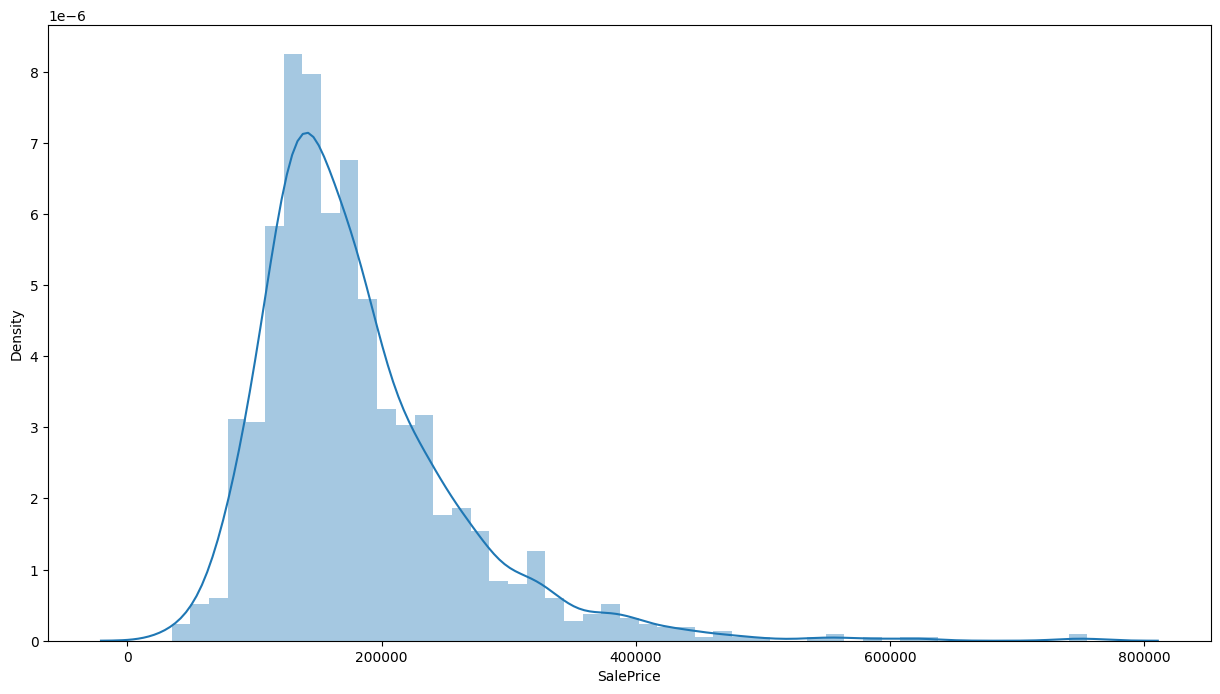

In [1118]:
plt.figure(figsize=(15,8))
sns.distplot(df_price['SalePrice'])
plt.show()

In [1119]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [1120]:
## we need to change the datatypes 

In [1121]:
cols = ['MSSubClass','OverallQual','OverallCond']

In [1122]:
for i in cols:
    df_price[i] = df_price[i].astype('object') 

In [1123]:
## check for missing values

In [1124]:
(df_price.isnull().sum()/len(df_price))*100

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64

In [1125]:

(df_price.isnull().sum()/(df_price.index.size)*100)[(df_price.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)


PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
MasVnrType      60.500171
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageQual       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrArea       0.787941
MSZoning         0.137033
Utilities        0.068517
Functional       0.068517
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
BsmtFinSF1       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
Electrical       0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
GarageCars       0.034258
KitchenQual      0.034258
GarageArea       0.034258
SaleType         0.034258
dtype: float64

### Missing Values
* some columns have more num of null values
* option is to drp these column
* instead of dropping let us we some feature engineering

In [1126]:
df_num = df_price.select_dtypes(include=np.number)
df_num =df_num.drop('SalePrice',axis=1)
df_cat = df_price.select_dtypes(exclude=np.number)

In [1127]:
cols=df_price.columns.to_list
cols

<bound method IndexOpsMixin.tolist of Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 

In [1128]:
df_price.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [1129]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df_num_sc=pd.DataFrame(imputer.fit_transform(df_num),columns=df_num.columns)

In [1130]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   object 
 17  OverallCond    2919 non-null   object 
 18  YearBuil

In [1131]:

(df_cat.isnull().sum()/(df_price.index.size)*100)[(df_cat.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)


PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
MasVnrType      60.500171
FireplaceQu     48.646797
GarageFinish     5.447071
GarageCond       5.447071
GarageQual       5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MSZoning         0.137033
Functional       0.068517
Utilities        0.068517
Exterior2nd      0.034258
Exterior1st      0.034258
KitchenQual      0.034258
Electrical       0.034258
SaleType         0.034258
dtype: float64

In [1132]:
df_cat.drop(['PoolQC','Alley','Fence','FireplaceQu','MiscFeature','MasVnrType'],axis=1,inplace=True)

In [1133]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     2919 non-null   object
 1   MSZoning       2915 non-null   object
 2   Street         2919 non-null   object
 3   LotShape       2919 non-null   object
 4   LandContour    2919 non-null   object
 5   Utilities      2917 non-null   object
 6   LotConfig      2919 non-null   object
 7   LandSlope      2919 non-null   object
 8   Neighborhood   2919 non-null   object
 9   Condition1     2919 non-null   object
 10  Condition2     2919 non-null   object
 11  BldgType       2919 non-null   object
 12  HouseStyle     2919 non-null   object
 13  OverallQual    2919 non-null   object
 14  OverallCond    2919 non-null   object
 15  RoofStyle      2919 non-null   object
 16  RoofMatl       2919 non-null   object
 17  Exterior1st    2918 non-null   object
 18  Exterior2nd    2918 non-null

In [1134]:
(df_cat.isnull().sum()/(df_price.index.size)*100)[(df_cat.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)


GarageCond      5.447071
GarageQual      5.447071
GarageFinish    5.447071
GarageType      5.378554
BsmtExposure    2.809181
BsmtCond        2.809181
BsmtQual        2.774923
BsmtFinType2    2.740665
BsmtFinType1    2.706406
MSZoning        0.137033
Functional      0.068517
Utilities       0.068517
Exterior2nd     0.034258
Exterior1st     0.034258
KitchenQual     0.034258
Electrical      0.034258
SaleType        0.034258
dtype: float64

In [1135]:
from sklearn.impute import SimpleImputer

In [1136]:
imputer = SimpleImputer(missing_values = np.nan,strategy='most_frequent')

In [1137]:
imputer=imputer.fit(df_cat.iloc[:,:])

In [1138]:
df_cat_trans=imputer.transform(df_cat)

In [1139]:
df_cat = pd.DataFrame(df_cat_trans,columns=df_cat.columns)

In [1140]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2919 non-null   float64
 1   LotArea        2919 non-null   float64
 2   YearBuilt      2919 non-null   float64
 3   YearRemodAdd   2919 non-null   float64
 4   MasVnrArea     2919 non-null   float64
 5   BsmtFinSF1     2919 non-null   float64
 6   BsmtFinSF2     2919 non-null   float64
 7   BsmtUnfSF      2919 non-null   float64
 8   TotalBsmtSF    2919 non-null   float64
 9   1stFlrSF       2919 non-null   float64
 10  2ndFlrSF       2919 non-null   float64
 11  LowQualFinSF   2919 non-null   float64
 12  GrLivArea      2919 non-null   float64
 13  BsmtFullBath   2919 non-null   float64
 14  BsmtHalfBath   2919 non-null   float64
 15  FullBath       2919 non-null   float64
 16  HalfBath       2919 non-null   float64
 17  BedroomAbvGr   2919 non-null   float64
 18  KitchenA

In [1141]:
from sklearn.preprocessing import StandardScaler

In [1142]:
sc=StandardScaler()

In [1143]:
df_num_standardized = pd.DataFrame(sc.fit_transform(df_num_sc),columns=df_num_sc.columns)
df_num_standardized

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.221296,-0.217879,1.046258,0.896833,0.522917,0.581115,-0.293098,-0.934991,-0.444192,-0.773861,...,0.348787,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,0.157646
1,0.442764,-0.072044,0.154764,-0.395604,-0.572740,1.178257,-0.293098,-0.630037,0.477226,0.261075,...,-0.059898,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.446925,-0.602962
2,-0.088484,0.137197,0.980221,0.848965,0.332854,0.098133,-0.293098,-0.288671,-0.298944,-0.610718,...,0.627436,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,1.026753,0.157646
3,-0.442649,-0.078385,-1.859351,-0.682812,-0.572740,-0.494618,-0.293098,-0.047439,-0.671142,-0.506205,...,0.785337,-0.740760,-0.184815,3.874967,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,-1.363569
4,0.619846,0.518903,0.947203,0.753229,1.383791,0.469151,-0.293098,-0.161228,0.211694,-0.037170,...,1.686303,0.776967,0.540424,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,2.132012,0.157646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-2.169203,-1.043937,-0.043346,-0.682812,-0.572740,-0.968819,-0.293098,-0.033784,-1.147737,-1.564083,...,-2.196208,-0.740760,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.078505,-1.363569
2915,-2.169203,-1.049263,-0.043346,-0.682812,-0.572740,-0.415585,-0.293098,-0.607279,-1.147737,-1.564083,...,-0.867981,-0.740760,-0.347624,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.815344,-1.363569
2916,3.984414,1.246808,-0.373528,0.561757,-0.572740,1.718319,-0.293098,-1.276357,0.390985,0.164209,...,0.478823,3.006130,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,1.026753,-1.363569
2917,-0.354107,0.034605,0.683057,0.370284,-0.572740,-0.228978,-0.293098,0.032213,-0.317100,-0.483263,...,-2.196208,-0.108374,-0.229217,-0.359601,-0.103331,-0.285935,-0.06315,1.144312,0.289914,-1.363569


In [1144]:
# pip install category_encoders

In [1145]:
import category_encoders as ce

In [1146]:
def cat_boost(cat_input,target):

  catboost = ce.cat_boost.CatBoostEncoder()
  catboost.fit(cat_input,target)
  df_encode= round(catboost.transform(cat_input),2)

  return df_encode

In [1147]:
df_priceDataset = pd.concat([df_num_standardized,df_cat],axis=1)
df_priceDataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-0.221296,-0.217879,1.046258,0.896833,0.522917,0.581115,-0.293098,-0.934991,-0.444192,-0.773861,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,0.442764,-0.072044,0.154764,-0.395604,-0.572740,1.178257,-0.293098,-0.630037,0.477226,0.261075,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,-0.088484,0.137197,0.980221,0.848965,0.332854,0.098133,-0.293098,-0.288671,-0.298944,-0.610718,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,-0.442649,-0.078385,-1.859351,-0.682812,-0.572740,-0.494618,-0.293098,-0.047439,-0.671142,-0.506205,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,0.619846,0.518903,0.947203,0.753229,1.383791,0.469151,-0.293098,-0.161228,0.211694,-0.037170,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [1148]:
df_priceDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2919 non-null   float64
 1   LotArea        2919 non-null   float64
 2   YearBuilt      2919 non-null   float64
 3   YearRemodAdd   2919 non-null   float64
 4   MasVnrArea     2919 non-null   float64
 5   BsmtFinSF1     2919 non-null   float64
 6   BsmtFinSF2     2919 non-null   float64
 7   BsmtUnfSF      2919 non-null   float64
 8   TotalBsmtSF    2919 non-null   float64
 9   1stFlrSF       2919 non-null   float64
 10  2ndFlrSF       2919 non-null   float64
 11  LowQualFinSF   2919 non-null   float64
 12  GrLivArea      2919 non-null   float64
 13  BsmtFullBath   2919 non-null   float64
 14  BsmtHalfBath   2919 non-null   float64
 15  FullBath       2919 non-null   float64
 16  HalfBath       2919 non-null   float64
 17  BedroomAbvGr   2919 non-null   float64
 18  KitchenA

In [1149]:
df_train =df_priceDataset.iloc[0:train.shape[0],]
df_train.shape

(1460, 73)

In [1150]:
df_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-0.221296,-0.217879,1.046258,0.896833,0.522917,0.581115,-0.293098,-0.934991,-0.444192,-0.773861,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,0.442764,-0.072044,0.154764,-0.395604,-0.572740,1.178257,-0.293098,-0.630037,0.477226,0.261075,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,-0.088484,0.137197,0.980221,0.848965,0.332854,0.098133,-0.293098,-0.288671,-0.298944,-0.610718,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,-0.442649,-0.078385,-1.859351,-0.682812,-0.572740,-0.494618,-0.293098,-0.047439,-0.671142,-0.506205,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,0.619846,0.518903,0.947203,0.753229,1.383791,0.469151,-0.293098,-0.161228,0.211694,-0.037170,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [1151]:
df_target=np.log(train['SalePrice'])

In [1152]:
df_target.shape

(1460,)

In [1153]:
df_train=pd.concat([df_train,df_target],axis=1)

In [1154]:
df_train.shape

(1460, 74)

In [1155]:
df_test =df_priceDataset.iloc[train.shape[0]:,]
df_test.shape

(1459, 73)

In [1156]:
df_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1460,0.442764,0.184371,-0.340510,-1.113625,-0.572740,0.058616,0.558228,-0.661898,-0.385185,-0.671897,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1461,0.487035,0.519791,-0.439565,-1.257229,0.030989,1.057511,-0.293098,-0.352393,0.629282,0.431865,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1462,0.177140,0.464374,0.848148,0.657493,-0.572740,0.767722,-0.293098,-0.964576,-0.280788,-0.590326,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
1463,0.354223,-0.024109,0.881166,0.657493,-0.460939,0.352796,-0.293098,-0.539006,-0.285327,-0.595424,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
1464,-1.195249,-0.654748,0.683057,0.370284,-0.572740,-0.391436,-0.293098,1.038106,0.518077,0.306959,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [1157]:
df_num_train =df_train.select_dtypes(include=np.number)
df_num_train.shape

(1460, 34)

In [1158]:
df_cat_train =df_train.select_dtypes(exclude=np.number)
df_cat_train.shape

(1460, 40)

In [1159]:
catboost = ce.cat_boost.CatBoostEncoder()
df_cat_en_train=catboost.fit_transform(df_cat_train,df_target)

In [1160]:
# df_cat_en =cat_boost(df_cat_train,df_target)

In [1161]:
df_cat_en_train.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051
1,12.024051,12.135873,12.135873,12.135873,12.135873,12.135873,12.024051,12.135873,12.024051,12.024051,...,12.135873,12.024051,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873
2,12.135873,12.126919,12.126919,12.024051,12.126919,12.126919,12.135873,12.126919,12.135873,12.135873,...,12.126919,12.135873,12.126919,12.126919,12.126919,12.126919,12.126919,12.126919,12.126919,12.126919
3,12.024051,12.174481,12.174481,12.170609,12.174481,12.174481,12.024051,12.174481,12.024051,12.196304,...,12.174481,12.196304,12.174481,12.024051,12.024051,12.174481,12.174481,12.174481,12.174481,12.024051
4,12.196304,12.109464,12.109464,12.063538,12.109464,12.109464,12.066531,12.109464,12.024051,12.109577,...,12.109464,12.109577,12.109464,12.174481,12.174481,12.109464,12.109464,12.109464,12.109464,12.174481


In [1162]:
df_train = pd.concat([df_num_train,df_cat_en_train],axis=1)
df_train.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-0.221296,-0.217879,1.046258,0.896833,0.522917,0.581115,-0.293098,-0.934991,-0.444192,-0.773861,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051
1,0.442764,-0.072044,0.154764,-0.395604,-0.572740,1.178257,-0.293098,-0.630037,0.477226,0.261075,...,12.135873,12.024051,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873


In [1163]:
df_train.shape

(1460, 74)

In [1164]:
## encoding for testing data

In [1165]:
df_num_test=df_test.select_dtypes(include=np.number)
df_num_test.shape

(1459, 33)

In [1166]:
df_cat_test=df_test.select_dtypes(exclude=np.number)
df_cat_test.shape

(1459, 40)

In [1167]:
df_cat_en_test = catboost.transform(df_cat_test)

In [1168]:
df_cat_en_test.shape

(1459, 40)

In [1169]:
df_cat_en_test.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1460,12.052734,11.765970,12.025521,11.936189,12.022695,12.024183,12.001921,12.020567,11.868735,11.820843,...,12.061412,11.810882,12.038501,12.103721,11.780706,12.034976,12.037164,12.059868,11.991087,12.00505
1461,12.052734,12.085831,12.025521,12.163178,12.022695,12.024183,12.027433,12.020567,11.868735,12.042901,...,12.061412,12.221999,12.038501,12.103721,11.780706,12.034976,12.037164,12.059868,11.991087,12.00505
1462,12.338922,12.085831,12.025521,12.163178,12.022695,12.024183,12.001921,12.020567,12.154156,12.042901,...,12.061412,11.810882,12.038501,12.103721,12.319970,12.034976,12.037164,12.059868,11.991087,12.00505
1463,12.338922,12.085831,12.025521,12.163178,12.022695,12.024183,12.001921,12.020567,12.154156,12.042901,...,12.061412,12.221999,12.038501,12.103721,12.319970,12.034976,12.037164,12.059868,11.991087,12.00505
1464,12.169878,12.085831,12.025521,12.163178,12.254645,12.024183,12.001921,12.020567,12.563892,12.042901,...,12.061412,12.221999,12.038501,12.103721,12.172321,12.034976,12.037164,12.059868,11.991087,12.00505


In [1170]:
df_test = pd.concat([df_num_test,df_cat_en_test],axis=1)
df_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1460,0.442764,0.184371,-0.340510,-1.113625,-0.572740,0.058616,0.558228,-0.661898,-0.385185,-0.671897,...,12.061412,11.810882,12.038501,12.103721,11.780706,12.034976,12.037164,12.059868,11.991087,12.00505
1461,0.487035,0.519791,-0.439565,-1.257229,0.030989,1.057511,-0.293098,-0.352393,0.629282,0.431865,...,12.061412,12.221999,12.038501,12.103721,11.780706,12.034976,12.037164,12.059868,11.991087,12.00505
1462,0.177140,0.464374,0.848148,0.657493,-0.572740,0.767722,-0.293098,-0.964576,-0.280788,-0.590326,...,12.061412,11.810882,12.038501,12.103721,12.319970,12.034976,12.037164,12.059868,11.991087,12.00505
1463,0.354223,-0.024109,0.881166,0.657493,-0.460939,0.352796,-0.293098,-0.539006,-0.285327,-0.595424,...,12.061412,12.221999,12.038501,12.103721,12.319970,12.034976,12.037164,12.059868,11.991087,12.00505
1464,-1.195249,-0.654748,0.683057,0.370284,-0.572740,-0.391436,-0.293098,1.038106,0.518077,0.306959,...,12.061412,12.221999,12.038501,12.103721,12.172321,12.034976,12.037164,12.059868,11.991087,12.00505


In [1171]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

In [1172]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1459 non-null   float64
 1   LotArea        1459 non-null   float64
 2   YearBuilt      1459 non-null   float64
 3   YearRemodAdd   1459 non-null   float64
 4   MasVnrArea     1459 non-null   float64
 5   BsmtFinSF1     1459 non-null   float64
 6   BsmtFinSF2     1459 non-null   float64
 7   BsmtUnfSF      1459 non-null   float64
 8   TotalBsmtSF    1459 non-null   float64
 9   1stFlrSF       1459 non-null   float64
 10  2ndFlrSF       1459 non-null   float64
 11  LowQualFinSF   1459 non-null   float64
 12  GrLivArea      1459 non-null   float64
 13  BsmtFullBath   1459 non-null   float64
 14  BsmtHalfBath   1459 non-null   float64
 15  FullBath       1459 non-null   float64
 16  HalfBath       1459 non-null   float64
 17  BedroomAbvGr   1459 non-null   float64
 18  Kitch

In [1173]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [1174]:
x=df_train.drop('SalePrice',axis=1)
y=df_train['SalePrice']

In [1175]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.30,random_state =0)

In [1176]:
lr=LinearRegression()

In [1177]:
model_lr = lr.fit(xtrain,ytrain)
pred_train=model_lr.predict(xtrain)
pred_test=model_lr.predict(xtest)

In [1178]:
r2_train = r2_score(ytrain,pred_train)
r2_test = r2_score(ytest,pred_test)
print("R2 train:",r2_train)
print("R2 test",r2_test)

R2 train: 0.8997655284434551
R2 test 0.8167732420547802


In [1179]:
print('RMSE Train:',np.sqrt(mean_squared_error(ytrain,pred_train)))
print('RMSE Test:',np.sqrt(mean_squared_error(ytest,pred_test)))

RMSE Train: 0.12725549645923204
RMSE Test: 0.16825746435611552


In [1180]:
df_test.shape

(1459, 73)

In [1181]:
lr=LinearRegression()
y_pred=[]

model_lr = lr.fit(xtrain,ytrain)
y_pred.append(model_lr.predict(df_test))

In [1182]:
pd.DataFrame(y_pred).T

,0
0,11.617850
1,11.996462
2,12.082513
3,12.158350
4,12.225858
...,...
1454,11.313996
1455,11.377272
1456,12.112926
1457,11.692788


In [1183]:
y_linear=pd.DataFrame(y_pred).T 

In [1184]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1185]:
model_prediction =pd.DataFrame({'ID':test.Id,'SalesPrice':test.TotalBsmtSF})
model_prediction

,ID,SalesPrice
0,1461,882.0
1,1462,1329.0
2,1463,928.0
3,1464,926.0
4,1465,1280.0
...,...,...
1454,2915,546.0
1455,2916,546.0
1456,2917,1224.0
1457,2918,912.0


In [1186]:
model_prediction.to_csv('Basic.csv',index=False)

In [1187]:
model_prediction['SalePrice'] = y_linear

In [1188]:
y_linear

,0
0,11.617850
1,11.996462
2,12.082513
3,12.158350
4,12.225858
...,...
1454,11.313996
1455,11.377272
1456,12.112926
1457,11.692788


In [1189]:
model_prediction['SalePrice']=np.exp(y_linear)

In [1190]:
model_prediction.head()

,ID,SalesPrice,SalePrice
0,1461,882.0,111062.672553
1,1462,1329.0,162179.974781
2,1463,928.0,176753.774414
3,1464,926.0,190679.719129
4,1465,1280.0,203996.549533


In [1191]:
model_prediction.drop(['SalesPrice'],axis=1,inplace=True)

In [1192]:
model_prediction.to_csv('LinearReg_V3.csv',index=False)

In [1193]:
model_prediction

,ID,SalePrice
0,1461,111062.672553
1,1462,162179.974781
2,1463,176753.774414
3,1464,190679.719129
4,1465,203996.549533
...,...,...
1454,2915,81960.801193
1455,2916,87314.490105
1456,2917,182212.000032
1457,2918,119705.272811


In [1194]:
## Second Model

In [1195]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV

In [1196]:
ridge=Ridge()
lasso=Lasso()
enet=ElasticNet()

In [1197]:
y_pred=[]

In [1198]:
params=({'alpha':[0.1,0.5,0.6,0.9,0.01,0.02,0.001,0.002,0.003,0.3,1,2,3,4,5,10,15,20]})
grid_ridge=GridSearchCV(estimator=ridge,param_grid=params,scoring='r2',cv=5)

In [1199]:
grid_ridge.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 0.6, 0.9, 0.01, 0.02, 0.001, 0.002,
                                   0.003, 0.3, 1, 2, 3, 4, 5, 10, 15, 20]},
             scoring='r2')

In [1200]:
grid_ridge.best_params_

{'alpha': 0.001}

In [1201]:
grid_ridge.fit(xtrain,ytrain)
pred_train=grid_ridge.predict(xtrain)
pred_test=grid_ridge.predict(xtest)
rmse_train = np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test = np.sqrt(mean_squared_error(ytest,pred_test))

In [1202]:
print(rmse_train)
print(rmse_test)

0.12725610159393833
0.16830805162419069


In [1203]:

y_pred.append(grid_ridge.predict(df_test))

In [1204]:
y_linear=pd.DataFrame(y_pred).T

In [1205]:
model_prediction['SalePrice']=np.exp(y_linear)
model_prediction.to_csv('LinearV3_ridge.csv',index=False)

In [1206]:
model_prediction

,ID,SalePrice
0,1461,111047.739898
1,1462,162126.142325
2,1463,176770.731649
3,1464,190682.401663
4,1465,204011.488323
...,...,...
1454,2915,81967.550104
1455,2916,87306.670062
1456,2917,182194.346855
1457,2918,119730.379566


* Lasso Model

In [1207]:
y_pred=[]

In [1208]:
lasso=Lasso()
params=({'alpha':[0.01, 0.02, 0.05, 0.001,0.005,0.009,0.002,0.003,0.004,0.005,0.007,0.008,1,2]})
grid_lasso=GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='r2',
                        cv=5)

In [1209]:
grid_lasso.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.02, 0.05, 0.001, 0.005, 0.009, 0.002,
                                   0.003, 0.004, 0.005, 0.007, 0.008, 1, 2]},
             scoring='r2')

In [1210]:
grid_lasso.best_params_

{'alpha': 0.002}

In [1211]:
grid_lasso.fit(xtrain,ytrain)
pred_train=grid_lasso.predict(xtrain)
pred_test=grid_lasso.predict(xtest)
rmse_train = np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test = np.sqrt(mean_squared_error(ytest,pred_test))

In [1212]:
print(rmse_train)
print(rmse_test)

0.13935132331832703
0.17725686583206646


In [1213]:
y_pred.append(grid_lasso.predict(df_test))

In [1214]:
y_linear=pd.DataFrame(y_pred).T

In [1215]:
model_prediction['SalePrice']=np.exp(y_linear)
model_prediction.to_csv('LinearV3_lasso.csv',index=False)

In [1216]:
model_prediction

,ID,SalePrice
0,1461,118005.081020
1,1462,149309.642303
2,1463,179510.215811
3,1464,194648.911638
4,1465,198150.911134
...,...,...
1454,2915,84816.512784
1455,2916,93126.387688
1456,2917,188295.816813
1457,2918,116275.264225


* Elasti Net

In [1217]:
enet=ElasticNet()
params=({'l1_ratio':[0.1,0.01,0.001,0.2,0.3,0.5,0.7,0.8,0.9,0.25],
         'alpha'   :[0.1,0.2,0.9,1,2,3,4,5,6,7,8,9,10,12,15,20]
        })

grid_enet=GridSearchCV(estimator=enet,
                       param_grid=params,
                       scoring='r2',
                       cv=5)

In [1218]:
y_pred=[]

In [1219]:
grid_enet.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                   12, 15, 20],
                         'l1_ratio': [0.1, 0.01, 0.001, 0.2, 0.3, 0.5, 0.7, 0.8,
                                      0.9, 0.25]},
             scoring='r2')

In [1220]:
grid_enet.best_params_

{'alpha': 0.1, 'l1_ratio': 0.001}

In [1221]:
grid_enet.fit(xtrain,ytrain)
pred_train=grid_enet.predict(xtrain)
pred_test=grid_enet.predict(xtest)
rmse_train = np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test = np.sqrt(mean_squared_error(ytest,pred_test))

In [1222]:
print(rmse_train)
print(rmse_test)

0.14683056106153144
0.18565957534402439


In [1223]:
y_pred.append(grid_enet.predict(df_test))

In [1224]:
y_linear=pd.DataFrame(y_pred).T

In [1225]:
model_prediction['SalePrice']=np.exp(y_linear)
model_prediction.to_csv('LinearV3_enet.csv',index=False)

In [1226]:
model_prediction

,ID,SalePrice
0,1461,117614.407398
1,1462,148693.006006
2,1463,188454.171083
3,1464,196531.549491
4,1465,177254.616513
...,...,...
1454,2915,90831.700005
1455,2916,101188.555756
1456,2917,188365.281610
1457,2918,118446.074060
